In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Additional questions for Titanic project

**Plot the ROC curve of your model. What is the AUC? Does it seem reasonable?**

In [1]:
#Using Titanic data results:

In [4]:
data_train = pd.read_csv('titanic/train.csv')
print('There are {} rows and {} columns in this csv.'.format(data_train.shape[0], data_train.shape[1]))
data_train.head()

There are 891 rows and 12 columns in this csv.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train_features = data_train[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]].copy()
data_train_features.head()

,Pclass,Fare,Sex,Age,SibSp,Embarked
0,3,7.2500,male,22.0,1,S
1,1,71.2833,female,38.0,1,C
2,3,7.9250,female,26.0,0,S
3,1,53.1000,female,35.0,1,S
4,3,8.0500,male,35.0,0,S


In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
data_train_features['Age'] = data_train_features[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
data_train_features = pd.get_dummies(data_train_features)

In [9]:
data_train_features

,Pclass,Fare,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.2500,22.0,1,0,1,0,0,1
1,1,71.2833,38.0,1,1,0,1,0,0
2,3,7.9250,26.0,0,1,0,0,0,1
3,1,53.1000,35.0,1,1,0,0,0,1
4,3,8.0500,35.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,13.0000,27.0,0,0,1,0,0,1
887,1,30.0000,19.0,0,1,0,0,0,1
888,3,23.4500,24.0,1,1,0,0,0,1
889,1,30.0000,26.0,0,0,1,1,0,0


In [10]:
y_data_train = data_train[["Survived"]]

In [11]:
X_train_np = data_train_features.to_numpy()

In [12]:
y_train_np = y_data_train.to_numpy()
y_train_np_reshape = y_train_np.reshape(-1)
y_train_np_reshape.shape

(891,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train_np, y_train_np_reshape, test_size=0.2,random_state=10)

In [15]:
X_train.shape

(712, 9)

In [16]:
X_test.shape

(179, 9)

In [17]:
from sklearn.ensemble import RandomForestClassifier
#Using hyperparameters from Lab5
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, max_features = None, random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_split=10,
                       n_estimators=1600, random_state=101)

In [18]:
rfc.score(X_test,y_test) #Final Score

0.8547486033519553

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix, accuracy_score

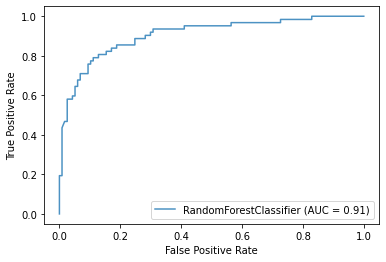

In [20]:
rfc_disp = plot_roc_curve(rfc, X_test, y_test, alpha=0.8)

- AUC = 0.91
- The maximum possible value for the AUC is 1. So 0.91 is a great indicator.
- ROC-plot shows the sensitivity vs 1-specificity for any possible threshold. The AUC could be understood as summarizing the average classification performance over any threshold.
- We use the AUC to compare performances of different classifiers. We would use the classifier with the greatest AUC. 

**Practical use case**: I am the CEO of the White Star Line, the company operating the Titanic.

I have just learned there has been on accident on our new cruise ship, the Titanic 2. The ship was an exact replica of the Titanic, and seem to have sunk under the exact same circumstances -- we do not really learn from our mistakes at White Star Line. We can assume the passengers followed the exact same distribution as the passengers from the Titanic, and behaved in the exact same way.

I do not yet know which passenger survived and which one died. However, I would like to start calling families of the (likely) deceased to try to avoid a lawsuit. I plan to use your model for this. I want to make sure that at least 80% of the families I call have lost a loved one during the accident, as otherwise this could lead to embarassing situations.

What percentage of deceased passenger's families will I be able to call?

For the sake of simplicity, you can consider that each passenger has a different family so that I will not call the same family twice (even though some passengers are siblings, parents etc).

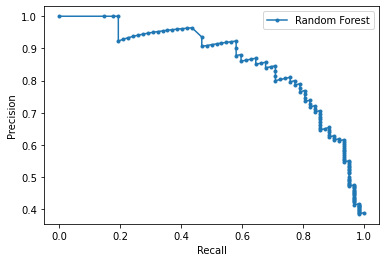

In [25]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve

# predict probabilities
rfc_probs = rfc.predict_proba(X_test)
# keep probabilities of Survival
rfc_probs = rfc_probs[:,1]
# predict class values
yhat = rfc.predict(X_test)
rfc_precision, rfc_recall, thresholds = precision_recall_curve(y_test, rfc_probs)
# plot the precision-recall curves
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [26]:
#We want to find the max recall while at the same time keeping a precision of at least 80%
#recall: percentage of deceased passenger's families that we are able to call
#precision: percentage of the families that we call that have lost a loved one during the accident
#Therefore we increment the threshold gradually until we find the trade-off point
for i in range(thresholds.shape[0]):
    if rfc_precision[i]>=0.8:
        final_precision=rfc_precision[i]
        final_recall=rfc_recall[i]
        final_threshold=thresholds[i]
        break

In [27]:
print("Final_precision = {}".format(final_precision))
print("Final_recall = {}".format(final_recall))
print("Final_threshold = {}".format(final_threshold))

Final_precision = 0.8
Final_recall = 0.7741935483870968
Final_threshold = 0.5226392398546943


- Therefore the threshold that would allow us to achieve the desired result if 0.52
- Recall = 77.4%

# Expectation maximization for mixtures of gaussians

We will use the Iris dataset.

In [28]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

In [29]:
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [30]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['blue', 'red', 'green'])

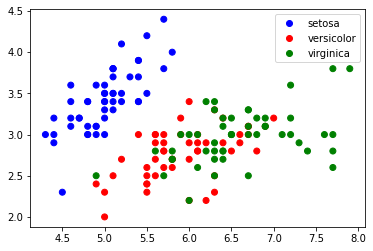

In [31]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

**Model the distribution of the points as a mixture of gaussians. What are the means of each cluster? What are the covariance matrices?**

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_iris)

GaussianMixture(n_components=3)

In [34]:
y_cluster_gmm = gmm.predict(X_iris)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

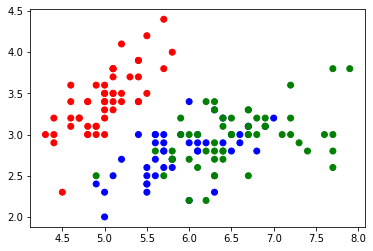

In [35]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_cluster_gmm,cmap=colormap)

In [36]:
gmm.covariances_ #Covariance matrix for each cluster

array([[[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]]])

In [37]:
gmm.means_ #Means of each cluster

array([[5.91697517, 2.77803998, 4.20523542, 1.29841561],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063]])

**Sample some new points from this distribution. Plot the first two dimensions of these new points as a scatter plot similarly to the figure above.**

Use three colors. It doesn't matter if the color are not the same.

In [38]:
gmm_samples= gmm.sample(n_samples=125) #Sample 125 new points from distribution

In [39]:
gmm_samples[0].shape

(125, 4)

In [40]:
gmm_samples[1].shape

(125,)

In [41]:
X_samples = gmm_samples[0]
y_samples = gmm_samples[1]

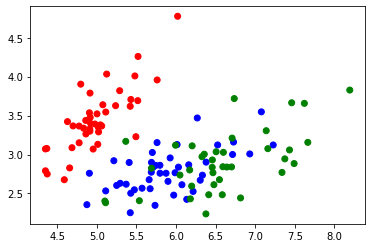

In [42]:
plt.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples,cmap=colormap);